Dataset:- https://www.kaggle.com/datasets/raphaelmanayon/temperature-and-ice-cream-sales/data

# STEP 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2. Load Dataset

In [2]:
df = pd.read_csv("../Datasets/Ice_cream_selling_data.csv")

In [3]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


# STEP 3: BASIC EDA

In [4]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [5]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [7]:
df.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [8]:
# Check for duplicates

df.duplicated().sum()

np.int64(0)

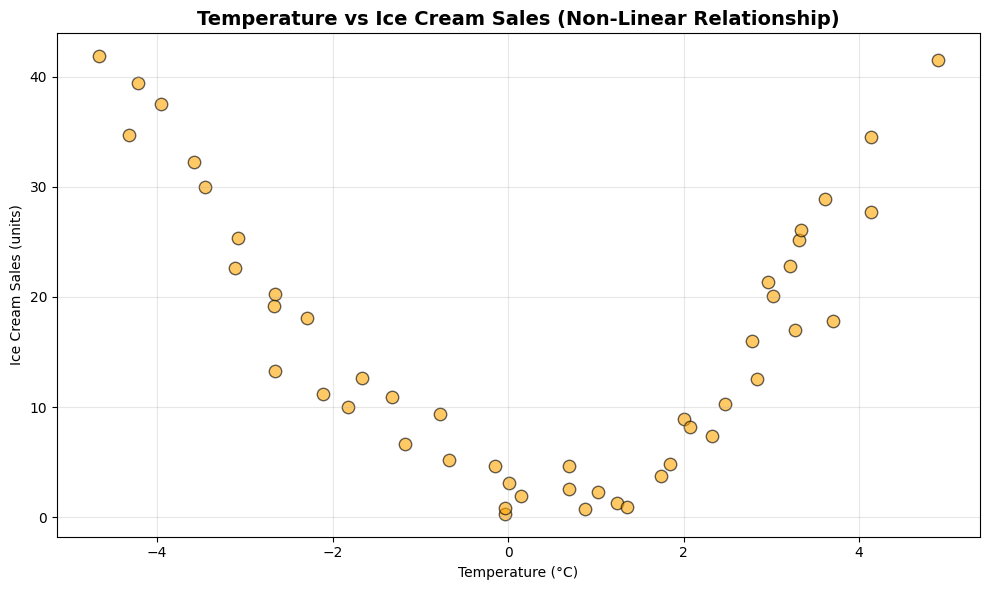


Observation: Sales increase non-linearly with temperature
This suggests polynomial regression (degree 2-3) will work best


In [9]:
# Rename columns for clarity (if needed)

if 'Temperature (°C)' in df.columns:
    df.rename(columns={'Temperature (°C)': 'Temperature', 'Ice Cream Sales (units)': 'Sales'}, inplace=True)

# Visulize the Relatationship
plt.figure(figsize=(10,6))
plt.scatter(df['Temperature'], df['Sales'], color='orange', s=80, alpha=0.6, edgecolor='black')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.title('Temperature vs Ice Cream Sales (Non-Linear Relationship)', 
          fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nObservation: Sales increase non-linearly with temperature")
print("This suggests polynomial regression (degree 2-3) will work best")

In [10]:
# Correlation
corr = df.corr()
print(f"Correlation Between Temperature and Sales: {corr.iloc[0,1]:.4f}")

Correlation Between Temperature and Sales: -0.1752


# STEP 4: Data Preparation

In [11]:
# Features and Target

X = df[['Temperature']].values
y = df['Sales'].values

In [12]:
X.shape

(49, 1)

In [13]:
y.shape

(49,)

## Split the datasets in to Train-Test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [16]:
X_train.shape

(39, 1)

In [17]:
X_test.shape

(10, 1)

# STEP 5: Linear Regression Baseline

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# Prediction

y_pred_linear = linear_model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
# Evaluatation

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Linear Mean Squared Error: {linear_mse:.4f}")
print(f"Linear Mean Absolute Error: {linear_mae:.4f} Units")
print(f"Linear R2 Score: {linear_r2}")
print(f"Linear RMSE: {rmse:.4f} Units")

Linear Mean Squared Error: 149.3263
Linear Mean Absolute Error: 11.7520 Units
Linear R2 Score: -0.5751270190188227
Linear RMSE: 12.2199 Units


# STEP 6: POLYNOMIAL REGRESSION (DEGREE 2)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Transform features

poly_feature = PolynomialFeatures(degree=2)

X_train_poly = poly_feature.fit_transform(X_train)
X_test_poly = poly_feature.transform(X_test)

In [25]:
X_train_poly[0]

array([ 1.        , -2.11186969,  4.45999359])

In [26]:
X_train_poly.shape

(39, 3)

In [27]:
X_test_poly.shape

(10, 3)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
poly_rag_model = LinearRegression()
poly_rag_model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
# predict

y_pred_poly = poly_rag_model.predict(X_test_poly)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
# Evaluatation

poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_mae = mean_absolute_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"Mean Squared Error: {poly_mse}")
print(f"Mean Absolute Error: {poly_mae}")
print(f"R2 Score: {poly_r2}")
print(f"Poly RMSE: {poly_rmse}")

Mean Squared Error: 14.878796440981484
Mean Absolute Error: 3.2299819836597274
R2 Score: 0.843055137193884
Poly RMSE: 3.857304297171988


# STEP 7: POLYNOMIAL REGRESSION (DEGREE 4)

In [ ]:
from sklearn.metrics import 

# STEP 8: VISUALIZATION

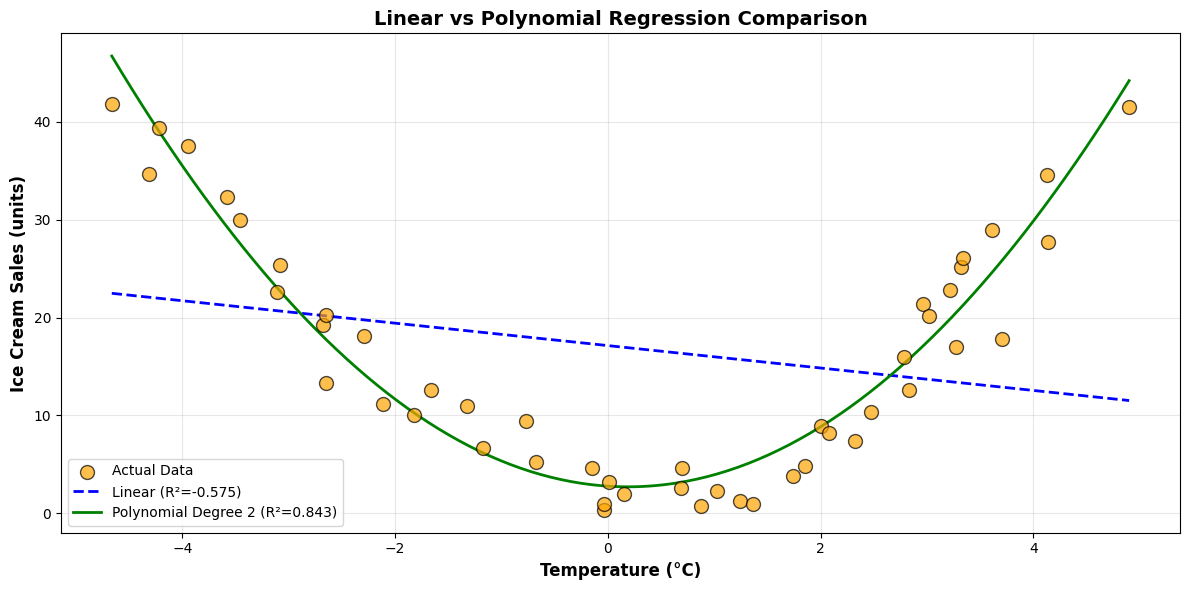

In [ ]:
# Create smooth curve
X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_smooth_poly_2 = poly_feature.transform(X_smooth)
# X_smooth_poly_3 = poly_features_3.transform(X_smooth)

y_smooth_linear = linear_model.predict(X_smooth)
y_smooth_poly_2 = poly_rag_model.predict(X_smooth_poly_2)
# y_smooth_poly_3 = poly_model_3.predict(X_smooth_poly_3)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='orange', s=100, alpha=0.7, 
            edgecolor='black', label='Actual Data', zorder=3)
plt.plot(X_smooth, y_smooth_linear, color='blue', linewidth=2, 
         linestyle='--', label=f'Linear (R²={linear_r2:.3f})')
plt.plot(X_smooth, y_smooth_poly_2, color='green', linewidth=2, 
         label=f'Polynomial Degree 2 (R²={poly_r2:.3f})')
# plt.plot(X_smooth, y_smooth_poly_3, color='red', linewidth=2, 
#          label=f'Polynomial Degree 3 (R²={poly_r2:.3f})')
plt.xlabel('Temperature (°C)', fontweight='bold', fontsize=12)
plt.ylabel('Ice Cream Sales (units)', fontweight='bold', fontsize=12)
plt.title('Linear vs Polynomial Regression Comparison', 
          fontweight='bold', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()